This file generates figures from our experiment results.

In [ ]:
import os
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
root = '/gdrive/MyDrive/cifar10_resnet/original/label_representations' 
os.chdir(root)

In [ ]:
output = root + '/outputs/'
labels = root + '/labels/'

In [ ]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## Training and Validation losses

In [ ]:
baseline_folder = output + 'log/baseline/'

results = sorted(glob.glob(baseline_folder + 'cifar10_*_log.csv'))

In [ ]:
cat = results[2:4]
cat

['/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/baseline/cifar10_category_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/baseline/cifar10_category_train_log.csv']

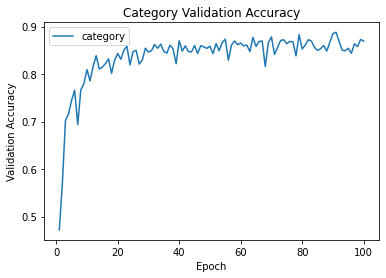

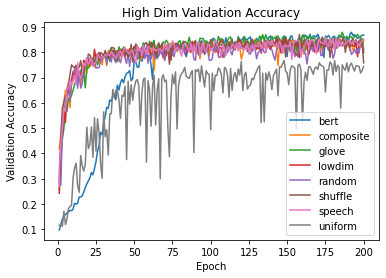

In [ ]:
test_acc = pd.DataFrame(columns=["Label", "Test Accuracy"])
ax = plt.gca()

# categorical results

for exp in cat:
  if "train" in exp:
    train = pd.read_csv(exp, header=0)

    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(train["Epoch"], train["Valid Acc"], color=color)
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend(["category"])
    plt.title("Category Validation Accuracy")
    plt.show()
  else:
    test = pd.read_csv(exp, header=0)
    test_acc.loc[len(test_acc.index)] = ["category", test["Test Acc"][0]]

ax = plt.gca()
for exp in results:

  if "category" in exp:
    continue
  label = exp.split('/')[-1].split('_')[1]

  if "train" in exp:
    train = pd.read_csv(exp, header=0)
  
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(train["Epoch"], train["Valid Acc"], color=color)

    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")

  else:
    test = pd.read_csv(exp, header=0)
    test_acc.loc[len(test_acc.index)] = [label, test["Test Acc"][0]]

handles = []
line1 = Line2D([0], [0], label='bert', color='C0')
line2 = Line2D([0], [0], label='composite', color='C1')
line3 = Line2D([0], [0], label='glove', color='C2')
line4 = Line2D([0], [0], label='lowdim', color='C3')
line5 = Line2D([0], [0], label='random', color='C4')
line6 = Line2D([0], [0], label='shuffle', color='C5')
line7 = Line2D([0], [0], label='speech', color='C6')
line8 = Line2D([0], [0], label='uniform', color='C7')

handles.extend([line1, line2, line3, line4,
                line5, line6, line7, line8])
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("High Dim Validation Accuracy")
plt.legend(handles=handles)
plt.show()

In [ ]:
print(test_acc.to_latex())

\begin{tabular}{llr}
\toprule
{} &      Label &  Test Accuracy \\
\midrule
0 &   category &         0.8882 \\
1 &       bert &         0.8790 \\
2 &  composite &         0.8510 \\
3 &      glove &         0.8788 \\
4 &     lowdim &         0.8564 \\
5 &     random &         0.8418 \\
6 &    shuffle &         0.8706 \\
7 &     speech &         0.8588 \\
8 &    uniform &         0.7674 \\
\bottomrule
\end{tabular}



## Data Efficiency

In [ ]:
folder = root + '/outputs/less/log/'
results = glob.glob(folder + '*.csv')
results

['/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/less/log/cifar10_less_data_speech_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/less/log/cifar10_less_data_shuffle_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/less/log/cifar10_less_data_uniform_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/less/log/cifar10_less_data_composite_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/less/log/cifar10_less_data_bert_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/less/log/cifar10_less_data_random_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/less/log/cifar10_less_data_lowdim_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/less/log/cifar10_less_data_glove_log.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/output

Text(0, 0.5, 'Test Accuracy (%)')

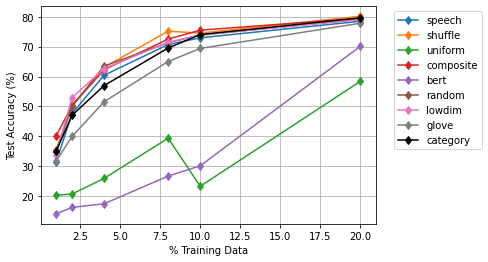

In [ ]:
for exp in results:
  name = exp.split('/')[-1].split('_')[3]
  acc = pd.read_csv(exp, header=0)

  if name == "category":
    plt.plot(acc['Data Level'], acc['Test Acc'] * 100, label=name, marker='d', color='black')
  else:
    plt.plot(acc['Data Level'], acc['Test Acc'] * 100, label=name, marker='d')

plt.grid()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("% Training Data")
plt.ylabel("Test Accuracy (%)")

## Robustness

In [ ]:
folder = output + 'log/attacks/original/'
attacks = glob.glob(folder + '*.csv')
attacks

['/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/composite.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/speech.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/categorical.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/random.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/shuffle.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/uniform.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/glove.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/bert.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/lowdim.csv']

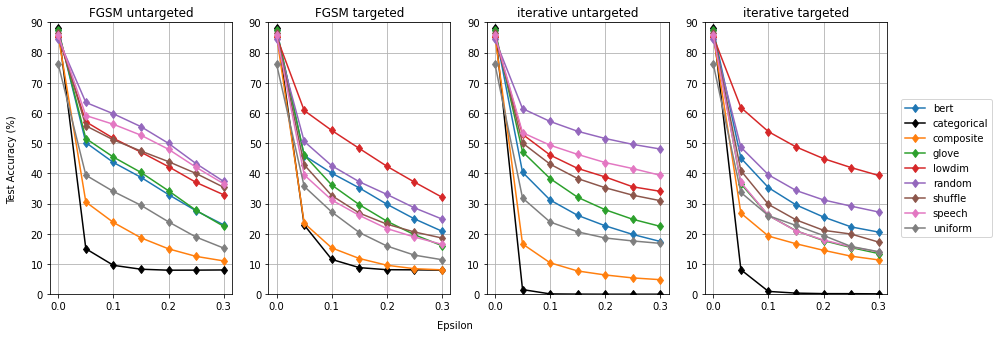

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]

types = ['FGSM untargeted', 'FGSM targeted', 'iterative untargeted', 'iterative targeted']

fig, axs = plt.subplots(1,4)
labels = []
counter = 0

for att in types:
  axs[counter].set_title(att)
  axs[counter].set_ylim([0,90])
  axs[counter].grid()
  for exp in attacks:
    name = exp.split('/')[-1].split('.')[0]
    labels.append(name)
    acc = pd.read_csv(exp, header=0)
    
    sub = acc[acc['Noise Method'] == (att + '\n')]

    if name == 'categorical':
      axs[counter].plot(sub['Epsilon'], sub['Test Accuracy']*100, label=name, marker='d', color='black')
    else:
      axs[counter].plot(sub['Epsilon'], sub['Test Accuracy']*100, label=name, marker='d')

  counter += 1

fig.text(0.09, 0.5, 'Test Accuracy (%)', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Epsilon', ha='center', va='center')
fig.legend(labels[:len(labels)//4], loc = 'center right')

## Exploring Entropy

In [ ]:
folder = output + 'log/attacks/entropy/'
attacks = sorted(glob.glob(folder + '*.csv'))
attacks

['/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=0005.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=0050.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=0200.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=1000.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=4000.csv']

In [ ]:
attacks.insert(0, output + 'log/attacks/original/uniform.csv')
attacks

['/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/uniform.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=0005.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=0050.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=0200.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=1000.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/entropy/dim=4000.csv']

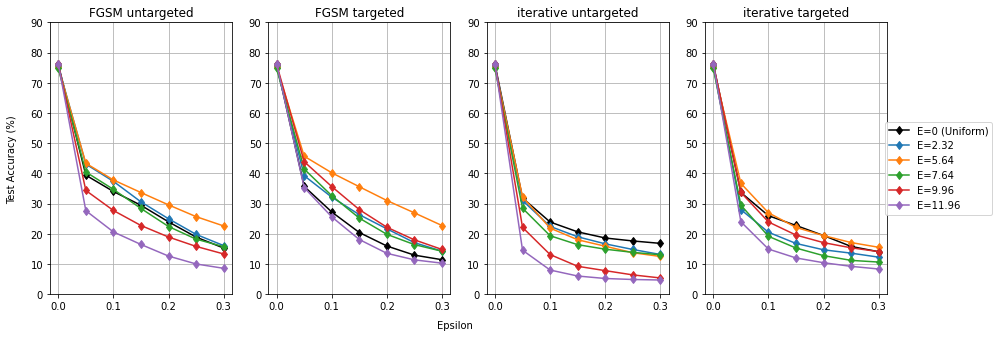

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]

types = ['FGSM untargeted', 'FGSM targeted', 'iterative untargeted', 'iterative targeted']

fig, axs = plt.subplots(1,4)



labels = []
counter = 0

for att in types:
  axs[counter].set_title(att)
  axs[counter].set_ylim([0,90])
  axs[counter].grid()
  for exp in attacks:
    name = exp.split('/')[-1].split('.')[0]
    labels.append(name)
    acc = pd.read_csv(exp, header=0)
    
    sub = acc[acc['Noise Method'] == (att + '\n')]

    if name == 'uniform':
      axs[counter].plot(sub['Epsilon'], sub['Test Accuracy']*100, label=name, marker='d', color='black')
    else:
      axs[counter].plot(sub['Epsilon'], sub['Test Accuracy']*100, label=name, marker='d')

  counter += 1

fig.text(0.09, 0.5, 'Test Accuracy (%)', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Epsilon', ha='center', va='center')
fig.legend(['E=0 (Uniform)', 'E=2.32', 'E=5.64', 'E=7.64', 'E=9.96', 'E=11.96'], loc='center right')

## Overlap across classes

In [ ]:
folder = output + 'log/attacks/overlap/'
attacks = sorted(glob.glob(folder + '*.csv'))
attacks

['/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=0.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=1.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=10.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=1e-1.csv']

In [ ]:
tmp = attacks[:]
attacks[1] = tmp[3]
attacks[2] = tmp[1]
attacks[3] = tmp[2]
attacks

['/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=0.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=1e-1.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=1.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=10.csv']

In [ ]:
attacks.append(output + 'log/attacks/original/random.csv')
attacks.append(output + 'log/attacks/original/lowdim.csv')
attacks.append(output + 'log/attacks/original/uniform.csv')
attacks

['/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=0.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=1e-1.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=1.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/overlap/gap=10.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/random.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/lowdim.csv',
 '/gdrive/MyDrive/cifar10_resnet/original/label_representations/outputs/log/attacks/original/uniform.csv']

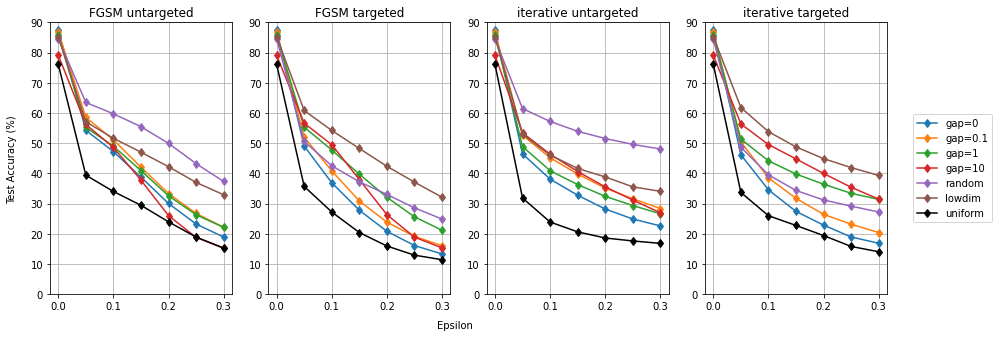

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]

types = ['FGSM untargeted', 'FGSM targeted', 'iterative untargeted', 'iterative targeted']

fig, axs = plt.subplots(1,4)
labels = []
counter = 0

for att in types:
  axs[counter].set_title(att)
  axs[counter].set_ylim([0,90])
  axs[counter].grid()
  for exp in attacks:
    name = exp.split('/')[-1].split('.')[0]
    if name == 'gap=1e-1':
      name = 'gap=0.1'
    labels.append(name)
    acc = pd.read_csv(exp, header=0)
    
    sub = acc[acc['Noise Method'] == (att + '\n')]

    if name == 'uniform':
      axs[counter].plot(sub['Epsilon'], sub['Test Accuracy']*100, label=name, marker='d', color='black')
    else:
      axs[counter].plot(sub['Epsilon'], sub['Test Accuracy']*100, label=name, marker='d')

  counter += 1

fig.text(0.09, 0.5, 'Test Accuracy (%)', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Epsilon', ha='center', va='center')
fig.legend(labels[:len(labels)//4], loc = 'center right')